In [129]:
# Data Reference: Automobile. (1987). UCI Machine Learning Repository.
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [130]:
csv = pd.read_csv("/Users/jk/Desktop/A/Study/Data Analysis/Practice Folder/automobile.csv")

### Data Formatting Block
pd.set_option("display.max_rows", None)

df = pd.DataFrame(csv.replace("?", np.NaN))
df.dropna(inplace = True) # Drop the rows that contains NaN values for data wrangling
df = pd.get_dummies(df, columns=['fuel-type']) # Reformat "fuel-type" column values into 0, 1
df["price"] = df["price"].astype(int) # Convert float values to int for linspace function

In [131]:
### Data Binning Block 
bins = np.linspace(min(df["price"]), max(df["price"]), 4)
bin_label = ["Low", "Medium", "High"]
df["price-binned"] = pd.cut(df["price"], bins, labels = bin_label, include_lowest = True) 

df = df[['make', 'price', 'price-binned', 'symboling', 'aspiration', 'num-of-doors',
         'fuel-type_diesel', 'fuel-type_gas', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 
         'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 
         'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 
         'peak-rpm', 'city-mpg', 'highway-mpg', 'normalized-losses']]

In [132]:
### Data Normalization Block
df["length"] = df["length"]/df["length"].max() # standarize scale of the size value
df["height"] = df["height"]/df["height"].max() 
df["width"] = df["width"]/df["width"].max() # 

In [133]:
### Quantitative Table 
# price_binned_count = df["price-binned"].value_counts().to_frame()
# price_binned_count.rename(columns = {"price-binned":"value_counts"}, inplace = True)

# display(price_binned_count)

In [134]:
### Data Binning Block 
bins = np.linspace(min(df["price"]), max(df["price"]), 4)
bin_label = ["Low", "Medium", "High"]
df["price-binned"] = pd.cut(df["price"], bins, labels = bin_label, include_lowest = True) 

,price,symboling,fuel-type_diesel,fuel-type_gas,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,normalized-losses
price,1.000000,-0.162794,0.261305,-0.261305,0.734419,0.760952,0.843371,0.244836,0.893639,0.841496,0.533890,0.160664,0.209361,0.759874,-0.171916,-0.692273,-0.720090,0.202761
symboling,-0.162794,1.000000,-0.163505,0.163505,-0.520591,-0.336257,-0.219186,-0.475185,-0.251880,-0.109453,-0.256469,-0.021285,-0.138316,-0.003949,0.199106,0.089550,0.149830,0.518344
fuel-type_diesel,0.261305,-0.163505,1.000000,-1.000000,0.339752,0.230757,0.312339,0.245546,0.287617,0.190333,0.061210,0.270438,0.987713,-0.100161,-0.447561,0.205928,0.149619,-0.110178
fuel-type_gas,-0.261305,0.163505,-1.000000,1.000000,-0.339752,-0.230757,-0.312339,-0.245546,-0.287617,-0.190333,-0.061210,-0.270438,-0.987713,0.100161,0.447561,-0.205928,-0.149619,0.110178
wheel-base,0.734419,-0.520591,0.339752,-0.339752,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.578159,0.167449,0.291431,0.516948,-0.289234,-0.580657,-0.611750,-0.060086
length,0.760952,-0.336257,0.230757,-0.230757,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.646318,0.121073,0.184814,0.672063,-0.234074,-0.724544,-0.724599,0.035541
width,0.843371,-0.219186,0.312339,-0.312339,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.572554,0.196619,0.258752,0.681872,-0.232216,-0.666684,-0.693339,0.109726
height,0.244836,-0.475185,0.245546,-0.245546,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.254836,-0.091313,0.233308,0.034317,-0.245864,-0.199737,-0.226136,-0.413702
curb-weight,0.893639,-0.251880,0.287617,-0.287617,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.645792,0.173844,0.224724,0.790095,-0.259988,-0.762155,-0.789338,0.125858
engine-size,0.841496,-0.109453,0.190333,-0.190333,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.595737,0.299683,0.141097,0.812073,-0.284686,-0.699139,-0.714095,0.207820


,make,price,price-binned,symboling,aspiration,num-of-doors,fuel-type_diesel,fuel-type_gas,body-style,drive-wheels,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,normalized-losses
3,audi,13950,Low,2,std,four,0,1,sedan,fwd,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,164.0
4,audi,17450,Medium,2,std,four,0,1,sedan,4wd,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,164.0
6,audi,17710,Medium,1,std,four,0,1,sedan,fwd,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,158.0
8,audi,23875,Medium,1,turbo,four,0,1,sedan,fwd,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,158.0
10,bmw,16430,Medium,2,std,two,0,1,sedan,rwd,...,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,192.0
11,bmw,16925,Medium,0,std,four,0,1,sedan,rwd,...,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,192.0
12,bmw,20970,Medium,0,std,two,0,1,sedan,rwd,...,164,mpfi,3.31,3.19,9.00,121.0,4250.0,21,28,188.0
13,bmw,21105,Medium,0,std,four,0,1,sedan,rwd,...,164,mpfi,3.31,3.19,9.00,121.0,4250.0,21,28,188.0
18,chevrolet,5151,Low,2,std,two,0,1,hatchback,fwd,...,61,2bbl,2.91,3.03,9.50,48.0,5100.0,47,53,121.0
19,chevrolet,6295,Low,1,std,two,0,1,hatchback,fwd,...,90,2bbl,3.03,3.11,9.60,70.0,5400.0,38,43,98.0


,engine-size,price
engine-size,1.000000,0.841496
price,0.841496,1.000000


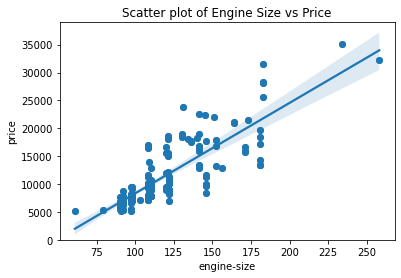

In [135]:
### Data Visualization Block 1
## Correlation between engine-size vs price which indicates that engine-size is a good predictor of price
x = df["engine-size"]
y = df["price"]

plt.title("Scatter plot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

sns.regplot(x = "engine-size", y = "price", data = df)
plt.ylim(0, )
plt.scatter(x, y)

# pearson_coef, p_value = stats.pearsonr(df["engine-size"], df["price"])
# display(pearson_coef, p_value)

display(df.corr(), df, df[["engine-size", "price"]].corr())